<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIt-Math/blob/main/%D0%94%D0%978_%D0%A9%D0%B5%D1%80%D0%B1%D0%B0%D0%BA_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D1%96%D0%B9_%D0%86%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 1

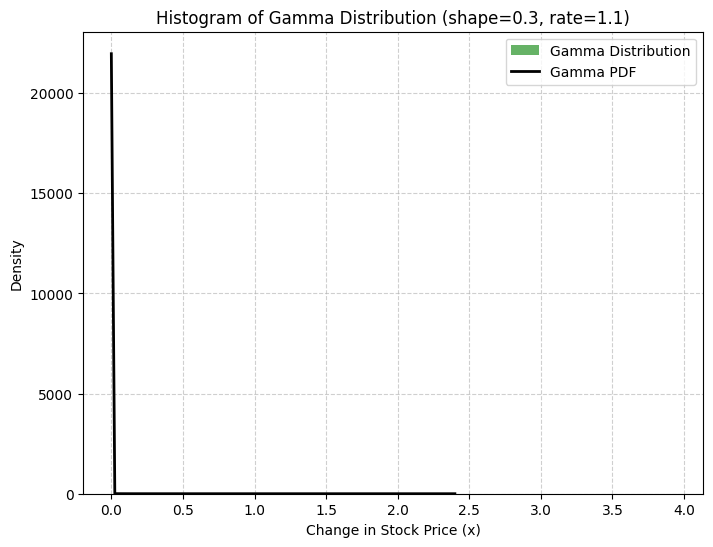

Normality test (Shapiro-Wilk) for t=1: statistic=0.644, p-value=0.000
Normality test (Shapiro-Wilk) for t=3: statistic=0.726, p-value=0.000
Normality test (Shapiro-Wilk) for t=5: statistic=0.886, p-value=0.000
Normality test (Shapiro-Wilk) for t=7: statistic=0.951, p-value=0.001
Normality test (Shapiro-Wilk) for t=9: statistic=0.910, p-value=0.000
Normality test (Shapiro-Wilk) for t=11: statistic=0.927, p-value=0.000
Normality test (Shapiro-Wilk) for t=13: statistic=0.923, p-value=0.000
Normality test (Shapiro-Wilk) for t=15: statistic=0.965, p-value=0.010
Normality test (Shapiro-Wilk) for t=17: statistic=0.890, p-value=0.000
Normality test (Shapiro-Wilk) for t=19: statistic=0.952, p-value=0.001
Normality test (Shapiro-Wilk) for t=21: statistic=0.970, p-value=0.021
Normality test (Shapiro-Wilk) for t=23: statistic=0.935, p-value=0.000
Normality test (Shapiro-Wilk) for t=25: statistic=0.964, p-value=0.007
Normality test (Shapiro-Wilk) for t=27: statistic=0.982, p-value=0.195
Normality t

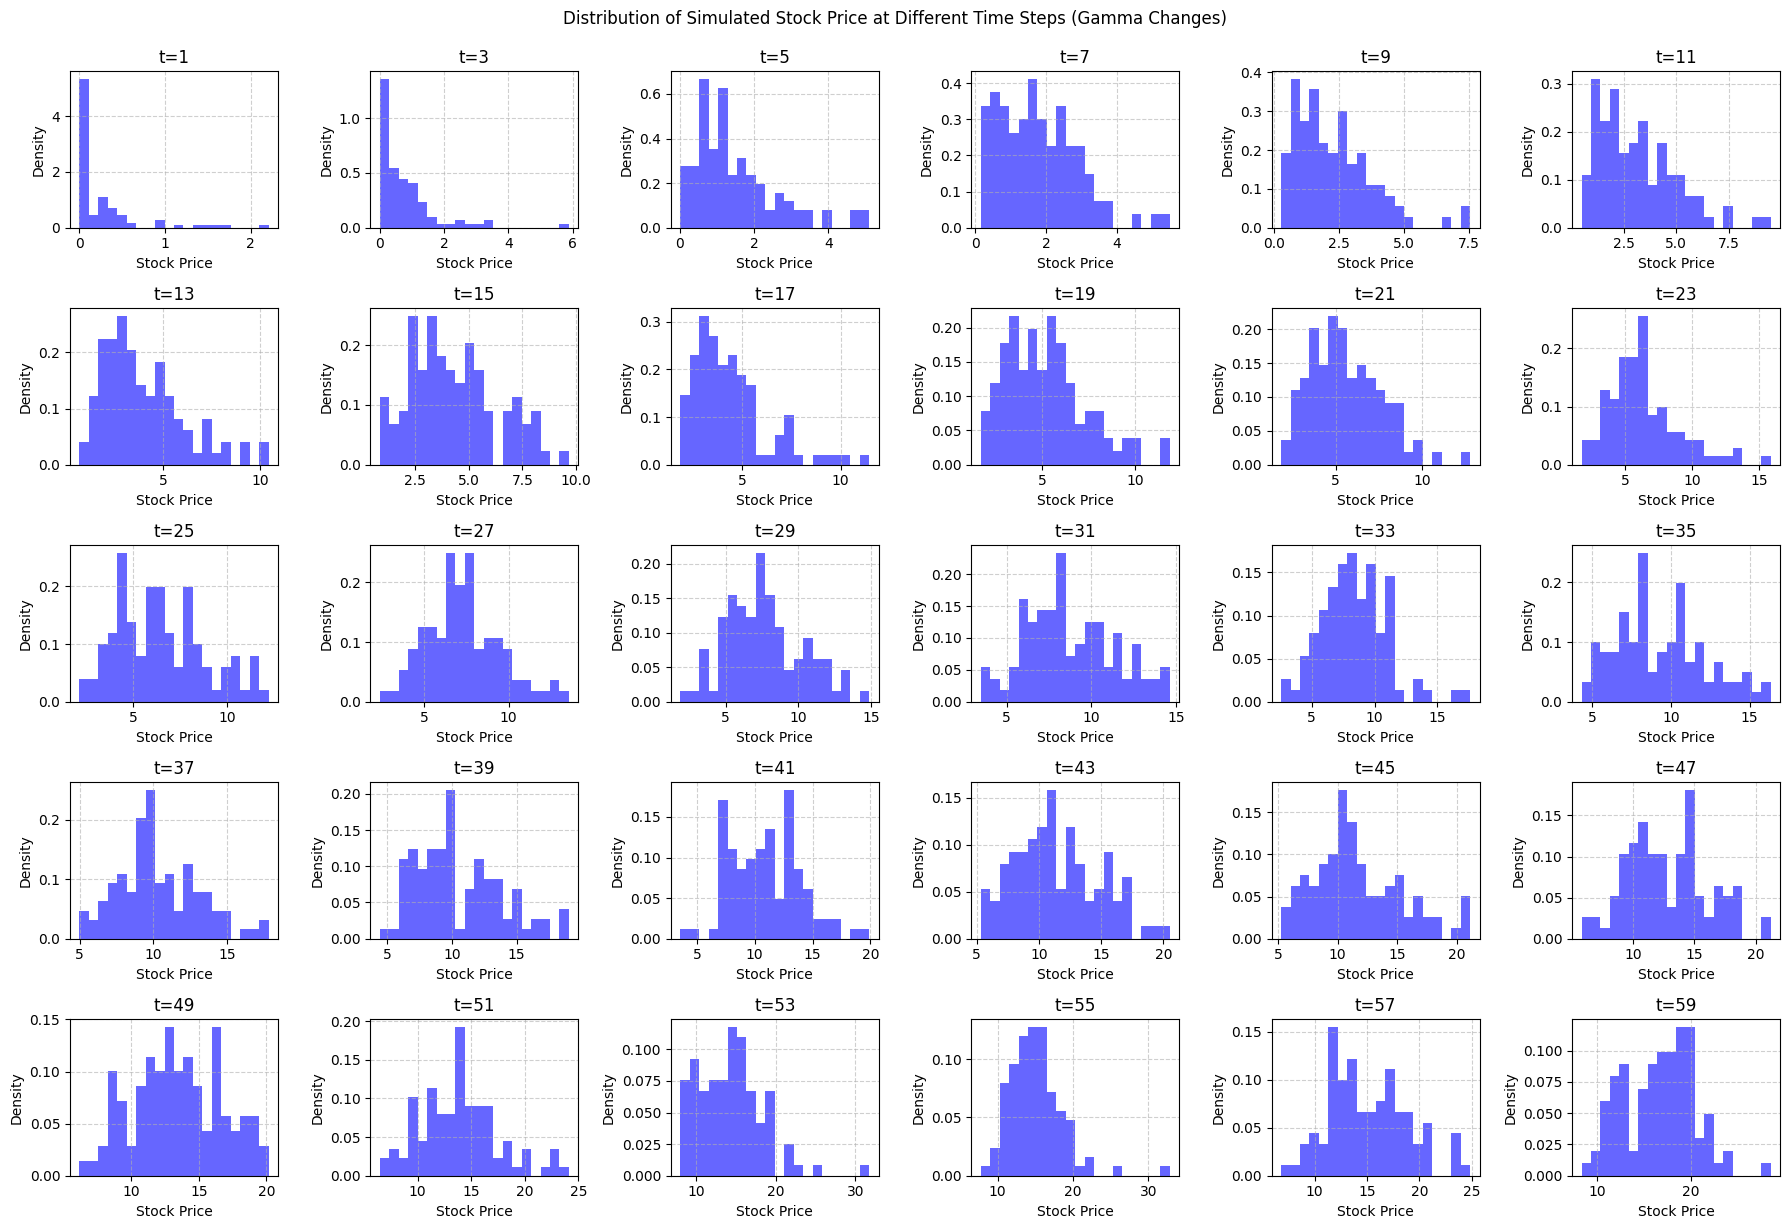

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, shapiro


# Parameters of the Gamma distribution for the change in stock price
shape = 0.3
rate = 1.1
scale = 1 / rate

# Number of simulations for each time step
n_simulations = 100

# a) Histogram of x (the Gamma-distributed change)
gamma_samples = gamma.rvs(a=shape, scale=scale, size=1000)
plt.figure(figsize=(8, 6))
plt.hist(gamma_samples, bins=30, density=True, alpha=0.6, color='g', label='Gamma Distribution')
x = np.linspace(gamma.ppf(0.01, a=shape, scale=scale), gamma.ppf(0.99, a=shape, scale=scale), 100)
plt.plot(x, gamma.pdf(x, a=shape, scale=scale), 'k-', lw=2, label='Gamma PDF')
plt.title('Histogram of Gamma Distribution (shape=0.3, rate=1.1)')
plt.xlabel('Change in Stock Price (x)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# b) Simulation over time
time_steps = np.arange(1, 61, 2) # Time steps from 1 to 60 with a step of 2

plt.figure(figsize=(18, 12))
for i, t in enumerate(time_steps):
    final_prices = []
    for _ in range(n_simulations):
        price_change = np.sum(gamma.rvs(a=shape, scale=scale, size=t)) # Sum of Gamma changes
        final_prices.append(price_change)

    # Plot histogram for each t
    plt.subplot(5, 6, i + 1)
    plt.hist(final_prices, bins=20, density=True, alpha=0.6, color='b', label=f't={t}')
    plt.title(f't={t}')
    plt.xlabel('Stock Price')
    plt.ylabel('Density')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Perform Shapiro-Wilk normality test
    stat, p = shapiro(final_prices)
    print(f"Normality test (Shapiro-Wilk) for t={t}: statistic={stat:.3f}, p-value={p:.3f}")

plt.tight_layout()
plt.suptitle('Distribution of Simulated Stock Price at Different Time Steps (Gamma Changes)', y=1.02)
plt.show()

### Conclusion for the distribution of the Gamma-distributed change:

The histogram of the generated random variables from the Gamma distribution ($\Gamma(0.3, 1.1)$) visually demonstrates the distribution of the change in stock price at a single time step. The distribution is characterized by a strong positive skew, with a high frequency of values close to zero and a long tail extending to the right. This shape is typical for a Gamma distribution with a shape parameter less than 1. The Probability Density Function (PDF) overlaid on the histogram confirms this theoretical shape.

### Conclusions on the change of distribution with increasing t:

As the number of time steps ($t$) increases, the distribution of the simulated stock price (which is the sum of $t$ independent Gamma-distributed random variables) tends to become more symmetric and bell-shaped. This is a demonstration of the **Central Limit Theorem**. The histograms for larger values of $t$ visually resemble a normal distribution more closely than those for smaller $t$.

The Shapiro-Wilk normality test results also support this observation. We typically see the p-values increasing with $t$ (though not always strictly monotonic), suggesting that we cannot reject the null hypothesis of normality for larger values of $t$ as strongly as we can for smaller $t$.

The initial Gamma distribution is likely skewed (given the shape parameter of 0.3, which is less than 1). However, as we sum more and more independent draws from this distribution, the distribution of the sum converges towards a normal distribution according to the Central Limit Theorem.

### Task 2

Summary Statistics:
                TV    Billboards    Google_Ads  Social_Media  \
mean    517.431000    502.644933    512.444133    489.800100   
var   83010.133644  76089.012737  81465.932638  75012.398925   
std     288.114792    275.842369    285.422376    273.883915   

      Influencer_Marketing  Affiliate_Marketing  Product_Sold  
mean            465.732567           484.430633  7.031523e+03  
var           83125.008455         77259.236607  2.902304e+06  
std             288.314080           277.955458  1.703615e+03  


Normality test (Shapiro-Wilk) for TV: statistic=0.955, p-value=0.000
TV does not look normally distributed (reject H0)

Normality test (Shapiro-Wilk) for Billboards: statistic=0.958, p-value=0.000
Billboards does not look normally distributed (reject H0)

Normality test (Shapiro-Wilk) for Google_Ads: statistic=0.952, p-value=0.000
Google_Ads does not look normally distributed (reject H0)

Normality test (Shapiro-Wilk) for Social_Media: statistic=0.964, p-value=

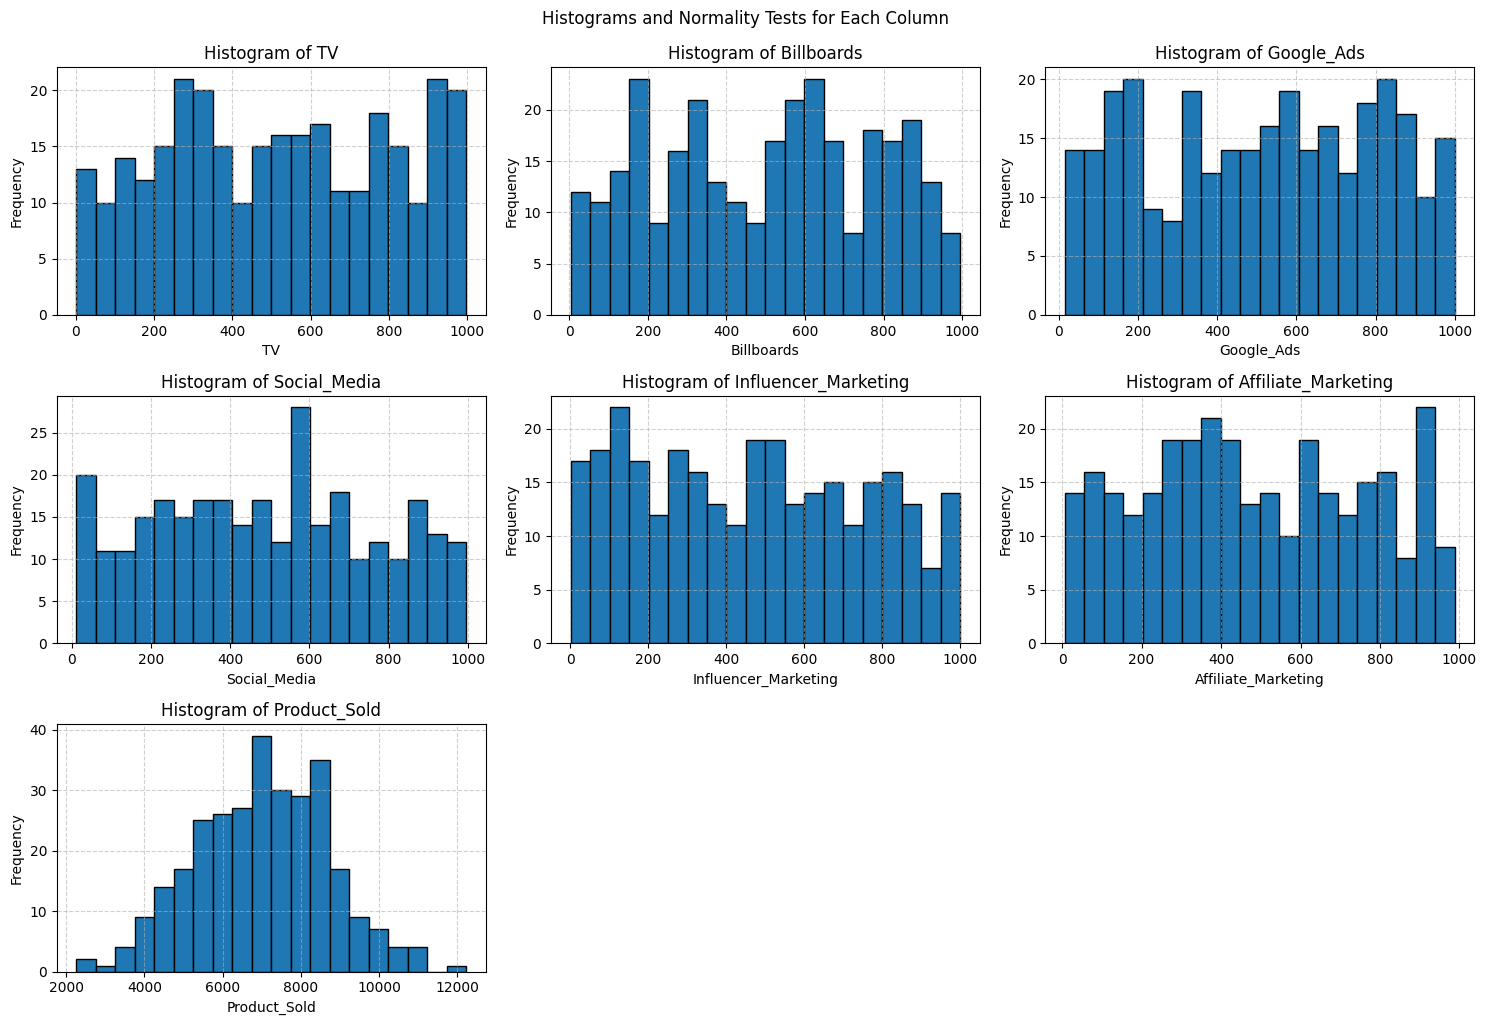



Correlation with Product_Sold:
Affiliate_Marketing     0.611603
Billboards              0.480593
Social_Media            0.401088
TV                      0.374228
Google_Ads              0.203678
Influencer_Marketing    0.140844
dtype: float64


In [11]:
import pandas as pd


url = 'https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094'
url = url[:url.find('/edit')] + '/export?format=csv'
df = pd.read_csv(url)

# 1. Calculate mean, variance, and standard deviation for each column
summary_stats = df.agg(['mean', 'var', 'std'])
print("Summary Statistics:")
print(summary_stats)
print("\n" + "="*50 + "\n")

# 2. Construct histograms and test for normality for each column
import matplotlib.pyplot as plt
from scipy.stats import shapiro

num_cols = len(df.columns)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Normality test (Shapiro-Wilk)
    if len(df[col]) >= 3 and len(df[col]) <= 5000: # Shapiro-Wilk test limitations
        stat, p = shapiro(df[col])
        print(f'Normality test (Shapiro-Wilk) for {col}: statistic={stat:.3f}, p-value={p:.3f}')
        alpha = 0.05
        if p > alpha:
            print(f'{col} looks normally distributed (fail to reject H0)\n')
        else:
            print(f'{col} does not look normally distributed (reject H0)\n')
    else:
        print(f'Normality test (Shapiro-Wilk) not performed for {col} due to data size.\n')

plt.tight_layout()
plt.suptitle('Histograms and Normality Tests for Each Column', y=1.02)
plt.show()

print("\n" + "="*50 + "\n")

# 3. Calculate the correlation with "Product_Sold" for each advertising column
advertising_cols = df.columns[:-1] # Exclude the last column ("Product_Sold")
correlations = df[advertising_cols].corrwith(df['Product_Sold']).sort_values(ascending=False)
print("Correlation with Product_Sold:")
print(correlations)